In [2]:
import pandas as pd

# Load the data from CSV
team_activity_file_path = 'data/team_activity.csv'
df = pd.read_csv(team_activity_file_path, index_col=0).transpose()


In [3]:
# Define the mapping from qualitative descriptions to numerical values
involvement_mapping = {
    'Strong': 3,
    'Good': 2,
    'Average': 1,
    'None': 0
}
involvement_columns = ['Funding', 'Application-Oriented', 'Demos', 'Industrial Collaborations', 'System Maturity', 'Number of Members', 'Academic Collaborations']

# Convert qualitative descriptions to numerical values
for column in involvement_columns:
    if column in df.columns:
        df[column] = df[column].map(involvement_mapping).fillna(0)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [15]:
# Apply Factor Analysis
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_results = fa.fit_transform(X_scaled)

In [16]:
# Create a DataFrame with the Factor Analysis results
fa_df = pd.DataFrame(data=fa_results, columns=['Factor1', 'Factor2'])
fa_df['Team'] = df.index

In [17]:
# Display the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=df.columns, columns=['Factor1', 'Factor2'])
print(factor_loadings)

                            Factor1   Factor2
Team                                         
Funding                   -0.546355 -0.248861
Application-Oriented      -0.612192  0.204794
Number of Members         -0.288099  0.442011
Academic Collaborations   -0.591636 -0.785128
System Maturity           -0.938720  0.156669
Demos                     -0.906122  0.387385
Industrial Collaborations -0.590910 -0.263268


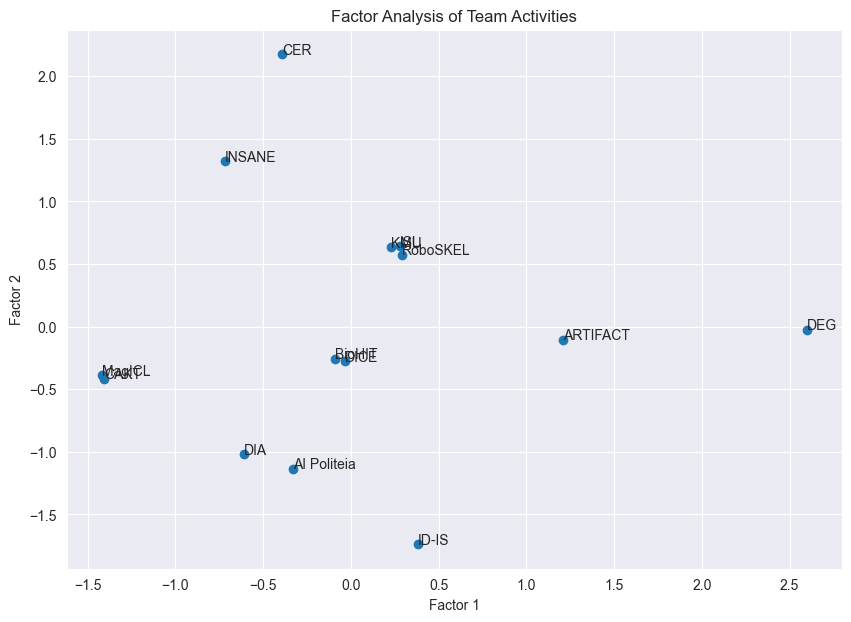

In [18]:
# Plot Factor Analysis results
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(fa_df['Factor1'], fa_df['Factor2'])
for i, txt in enumerate(fa_df['Team']):
    plt.annotate(txt, (fa_df['Factor1'][i], fa_df['Factor2'][i]))
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis of Team Activities')
plt.show()

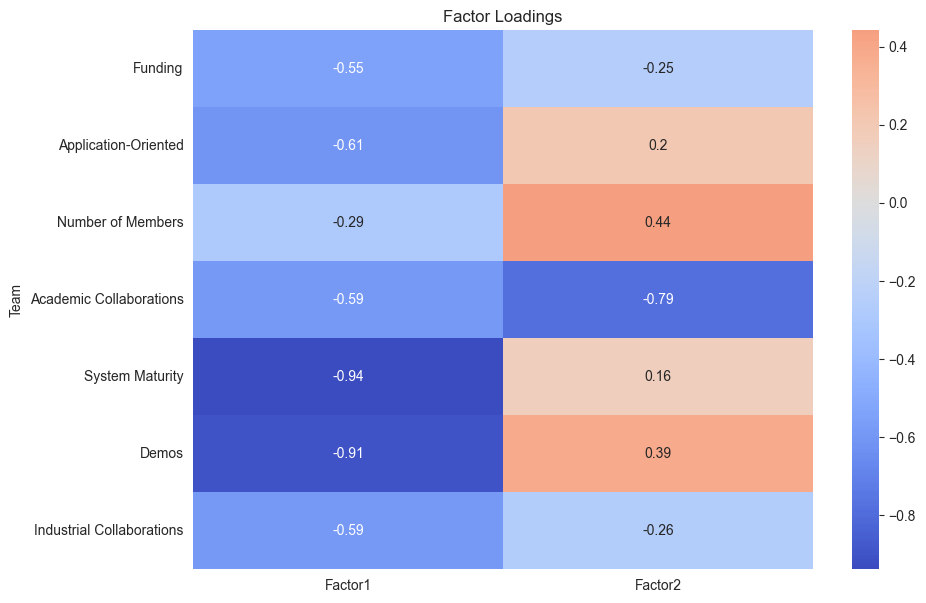

In [20]:
import seaborn as sns

# Plot the factor loadings
plt.figure(figsize=(10, 7))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.show()
